# **Aula 01**

### Biblioteca

In [42]:
import pandas as pd

### Data Set a ser usado

In [43]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


### Descrição de dados que temos na tabela

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


### Variável de um único Bairro

In [34]:
imoveis_vilaMariana = (dados.Bairro == 'Vila Mariana')
imoveis_vilaMariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

### Tabela de acordo com variável declarada anteriormente

In [37]:
imoveisVM = dados[imoveis_vilaMariana]
imoveisVM

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


### Quantidade de imóveis por Bairro

In [44]:
dados["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

### Variável mantém valor total dos imóveis de acordo com cada Bairro

In [45]:
n_imoveis_bairro = dados.Bairro.value_counts()

### Gráfico com os 5 mais populosos de SP

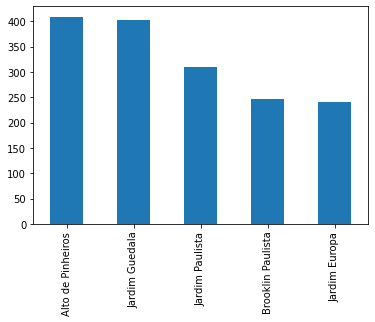

In [46]:
n_imoveis_bairro.head(5).plot.bar()

# **Desafios 01**

## 1 - Realizar a média da metragem para cara um dos bairros (Paulo)


Média de cada um dos bairros

In [102]:
dados.groupby('Bairro')['Metragem'].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

## 2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

Selecionando o Bairro usando index [coluna] [linha]

In [103]:
dados["Bairro"][4322]

'Jardim Paulistano'

Mesma seleção de outra forma

In [104]:
dados.Bairro[6022]

'Tremembé'

Localizando um imóvel aleatório no bairro de Interlágos

In [105]:
dados[dados["Bairro"] == 'Interlagos'].sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9038,Avenida Mahatma Gandhi,Interlagos,São Paulo,455,3,4,4,R$ 3.000.000


## 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)


**Mais quartos, mais caro?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


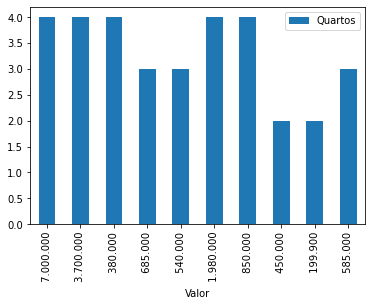

In [139]:
dados['Valor'] = dados['Valor'].str.replace('$', '').str.replace('R', '')
dados.head(10).plot.bar(x='Valor', y='Quartos')

Observa-se que não há relação de que quanto mais cômodos, mais caro seja

## 4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [132]:
# Média
mdDados = dados.Metragem.mean()
# Mediana
mdnDados = dados.Metragem.median()
# Mínima
minDados = dados.Metragem.min()
# Máxima
maxDados = dados.Metragem.max()

In [138]:
print(f'Média: {mdDados} | Mediana: {mdnDados} | Mínina: {minDados} | Máxima: {maxDados}')

Média: 442.30065947242207 | Mediana: 290.0 | Mínina: 10 | Máxima: 750000


## 5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

*Descobrir o total de valores nulos*

In [112]:
dados.isnull().sum()

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

*Variável para isolar bairros que não tem nome de Rua cadastrado*

In [113]:
sem_rua = dados[dados['Rua'].isnull()]
sem_rua['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

*Mostrar quais linhas não possuem valores em Bairro*

In [114]:
sem_bairro = dados[dados['Bairro'].isnull()]
sem_bairro.head(12)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,R$ 9.800\n /Mês
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,R$ 640.000
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$ 6.895.000
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$ 4.000.000
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$ 3.890.000
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
